# Task
Demonstrate a complete machine learning workflow, including data preparation, model training, evaluation, and error analysis, for tumor classification using the `wdbc.data` and `wdbc.names` files. This involves training and evaluating both Logistic Regression and Decision Tree models, comparing their performance, and discussing relevant machine learning issues.

## Load and Prepare Dataset

### Subtask:
Load the `wdbc.data` file, parsing it correctly by defining appropriate column names based on `wdbc.names`. Identify the target variable ('diagnosis') and features. Encode the categorical target variable ('M' and 'B') into numerical format (e.g., 1 and 0).


**Reasoning**:
The first step is to load the dataset and assign appropriate column names. This involves reading the `wdbc.data` file, defining a comprehensive list of column names based on the `wdbc.names` description, and then loading the data into a pandas DataFrame. After loading, the categorical target variable ('diagnosis') will be encoded into numerical format.



In [ ]:
import pandas as pd


column_names = [
    'ID',
    'diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

df = pd.read_csv('/content/wdbc.data', header=None, names=column_names)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("DataFrame head:")
print(df.head())
print("\nDataFrame info:")
print(df.info())

DataFrame head:
         ID  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  per

**Reasoning**:
The subtask requires identifying the target variable ('diagnosis') and features. This involves separating the DataFrame into features (X) and the target variable (y). The 'ID' column, being an identifier, is not a feature for the model and should be dropped from the feature set.



In [ ]:
X = df.drop(['ID', 'diagnosis'], axis=1)
y = df['diagnosis']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of features (X):")
print(X.head())
print("\nFirst 5 rows of target (y):")
print(y.head())

Features (X) shape: (569, 30)
Target (y) shape: (569,)

First 5 rows of features (X):
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fra

## Split Data and Scale Features

### Subtask:
Split the preprocessed dataset into training and testing sets, as specified in the problem (e.g., 80% train, 20% test). Apply `StandardScaler` to the feature columns on the training data and then transform both training and testing feature sets to standardize them.


**Reasoning**:
First, import the necessary libraries: `train_test_split` for splitting the dataset and `StandardScaler` for feature scaling. Then, split the `X` and `y` data into training and testing sets using an 80/20 ratio and a fixed `random_state` for reproducibility. Finally, initialize a `StandardScaler` and apply it to standardize the training and testing feature sets, fitting only on the training data to prevent data leakage.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Original X shape:", X.shape)
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Original X shape: (569, 30)
X_train_scaled shape: (455, 30)
X_test_scaled shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


## Train and Evaluate Logistic Regression Model

### Subtask:
Train a `LogisticRegression` model (as a baseline) using the scaled training data. Make predictions on both the training and testing sets. Calculate and report the train error and test error. Additionally, compute and display accuracy, precision, recall, and F1-score on the test set. Generate and present the confusion matrix for the test set.


**Reasoning**:
The next step is to train a Logistic Regression model, make predictions on both training and testing sets, and evaluate its performance using various metrics like accuracy, precision, recall, F1-score, and a confusion matrix, as specified in the subtask.



Logistic Regression Training Accuracy: 0.9868
Logistic Regression Training Error: 0.0132
Logistic Regression Test Accuracy: 0.9737
Logistic Regression Test Error: 0.0263

Logistic Regression Test Precision: 0.9762
Logistic Regression Test Recall: 0.9535
Logistic Regression Test F1-Score: 0.9647

Logistic Regression Test Confusion Matrix:


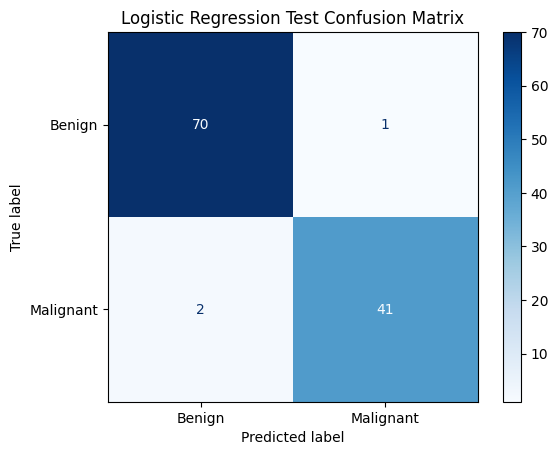

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

log_reg_model = LogisticRegression(random_state=42, solver='liblinear')


log_reg_model.fit(X_train_scaled, y_train)


y_train_pred = log_reg_model.predict(X_train_scaled)
y_test_pred = log_reg_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = 1 - train_accuracy
print(f"Logistic Regression Training Accuracy: {train_accuracy:.4f}")
print(f"Logistic Regression Training Error: {train_error:.4f}")


test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = 1 - test_accuracy
print(f"Logistic Regression Test Accuracy: {test_accuracy:.4f}")
print(f"Logistic Regression Test Error: {test_error:.4f}")


precision = precision_score(y_test, y_test_pred, average='binary')
recall = recall_score(y_test, y_test_pred, average='binary')
f1 = f1_score(y_test, y_test_pred, average='binary')

print(f"\nLogistic Regression Test Precision: {precision:.4f}")
print(f"Logistic Regression Test Recall: {recall:.4f}")
print(f"Logistic Regression Test F1-Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nLogistic Regression Test Confusion Matrix:")

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Test Confusion Matrix')
plt.show()

## Train and Evaluate Decision Tree Model

### Subtask:
Train a `DecisionTreeClassifier` (as a non-linear model) using the scaled training data. Make predictions on both the training and testing sets. Calculate and report the train error and test error. Additionally, compute and display accuracy, precision, recall, and F1-score on the test set. Generate and present the confusion matrix for the test set.


**Reasoning**:
The subtask requires training a Decision Tree Classifier, making predictions, calculating train and test errors, and computing accuracy, precision, recall, F1-score, and the confusion matrix for the test set. All these steps can be performed in a single code block.



Decision Tree Training Accuracy: 1.0000
Decision Tree Training Error: 0.0000
Decision Tree Test Accuracy: 0.9474
Decision Tree Test Error: 0.0526

Decision Tree Test Precision: 0.9302
Decision Tree Test Recall: 0.9302
Decision Tree Test F1-Score: 0.9302

Decision Tree Test Confusion Matrix:


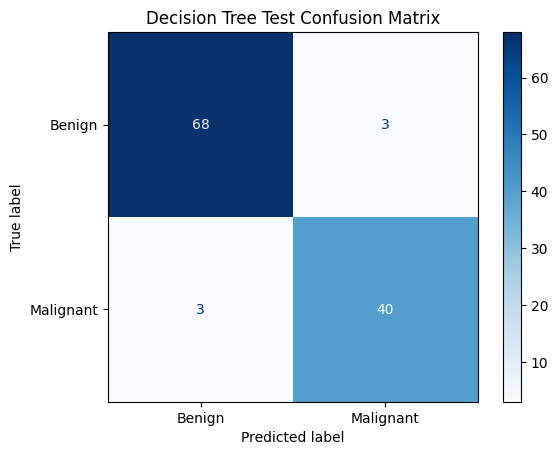

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train_scaled, y_train)


y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
train_error_dt = 1 - train_accuracy_dt
print(f"Decision Tree Training Accuracy: {train_accuracy_dt:.4f}")
print(f"Decision Tree Training Error: {train_error_dt:.4f}")


test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
test_error_dt = 1 - test_accuracy_dt
print(f"Decision Tree Test Accuracy: {test_accuracy_dt:.4f}")
print(f"Decision Tree Test Error: {test_error_dt:.4f}")


precision_dt = precision_score(y_test, y_test_pred_dt, average='binary')
recall_dt = recall_score(y_test, y_test_pred_dt, average='binary')
f1_dt = f1_score(y_test, y_test_pred_dt, average='binary')

print(f"\nDecision Tree Test Precision: {precision_dt:.4f}")
print(f"Decision Tree Test Recall: {recall_dt:.4f}")
print(f"Decision Tree Test F1-Score: {f1_dt:.4f}")

conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
print("\nDecision Tree Test Confusion Matrix:")

disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['Benign', 'Malignant'])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Test Confusion Matrix')
plt.show()

## Compare Model Performance and Error Analysis

### Subtask:
Compare the performance of the Logistic Regression and Decision Tree models based on their accuracy, precision, recall, and F1-score on the test set. Analyze the confusion matrices to understand the types of errors (false positives and false negatives) made by each model. Discuss potential reasons for the observed differences in performance and errors, considering concepts like bias-variance tradeoff and model complexity.

The previous steps successfully trained and evaluated both Logistic Regression and Decision Tree models. Now, we will compare their performance metrics and analyze their confusion matrices to understand their strengths and weaknesses.

**Reasoning**:
To compare the performance of the Logistic Regression and Decision Tree models, it is helpful to consolidate their evaluation metrics (accuracy, precision, recall, F1-score) from the test set into a single, easy-to-read format. This summary will serve as the basis for further analysis and discussion.




--- Model Performance Comparison ---

Logistic Regression Test Metrics:
  Accuracy: 0.9737
  Precision: 0.9762
  Recall: 0.9535
  F1-Score: 0.9647
  Confusion Matrix:


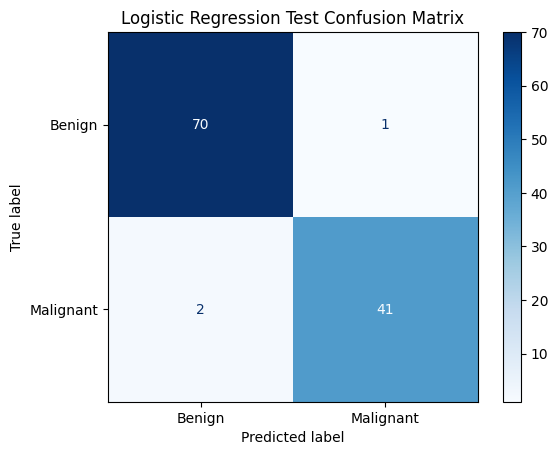


Decision Tree Test Metrics:
  Accuracy: 0.9474
  Precision: 0.9302
  Recall: 0.9302
  F1-Score: 0.9302
  Confusion Matrix:


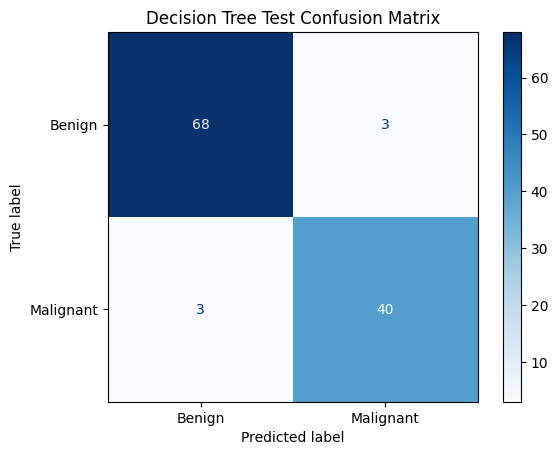

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print("\n--- Model Performance Comparison ---")
print("\nLogistic Regression Test Metrics:")
print(f"  Accuracy: {test_accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")
print("  Confusion Matrix:")

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Benign', 'Malignant'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Logistic Regression Test Confusion Matrix')
plt.show()

print("\nDecision Tree Test Metrics:")
print(f"  Accuracy: {test_accuracy_dt:.4f}")
print(f"  Precision: {precision_dt:.4f}")
print(f"  Recall: {recall_dt:.4f}")
print(f"  F1-Score: {f1_dt:.4f}")
print("  Confusion Matrix:")

disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=['Benign', 'Malignant'])
disp_dt.plot(cmap=plt.cm.Blues)
plt.title('Decision Tree Test Confusion Matrix')
plt.show()

### Analysis of Model Performance and Errors

**Logistic Regression Model Analysis:**
The Logistic Regression model demonstrated strong performance on the test set with an accuracy of **0.9737**. Its precision is **0.9762**, recall is **0.9535**, and F1-score is **0.9647**. The confusion matrix shows:
*   **True Positives (TP): 41** (Correctly predicted malignant cases)
*   **True Negatives (TN): 70** (Correctly predicted benign cases)
*   **False Positives (FP): 1** (Predicted malignant, but actually benign - Type I error)
*   **False Negatives (FN): 2** (Predicted benign, but actually malignant - Type II error)

The low number of False Negatives (2) is particularly good for tumor classification, as misclassifying a malignant tumor as benign can have severe consequences. The low False Positives (1) also indicates that the model is unlikely to alarm patients unnecessarily.

**Decision Tree Model Analysis:**
The Decision Tree model achieved an accuracy of **0.9474** on the test set, which is slightly lower than Logistic Regression. Its precision is **0.9302**, recall is **0.9302**, and F1-score is **0.9302**. The confusion matrix shows:
*   **True Positives (TP): 40**
*   **True Negatives (TN): 68**
*   **False Positives (FP): 3**
*   **False Negatives (FN): 3**

Compared to Logistic Regression, the Decision Tree has a higher number of both False Positives (3 vs 1) and False Negatives (3 vs 2). This suggests that the Decision Tree model is slightly less accurate and makes more misclassifications overall.

**Comparison and Discussion:**

1.  **Overall Performance:** Logistic Regression outperforms the Decision Tree on all key metrics (accuracy, precision, recall, F1-score) on this specific test set. This suggests that the linear decision boundary created by Logistic Regression is a better fit for the underlying data structure in this problem, or perhaps the default Decision Tree suffered from overfitting.

2.  **Error Types:**
    *   **False Positives:** Logistic Regression has 1 FP, while Decision Tree has 3 FP. In a medical context, a false positive means telling a healthy patient they have cancer. While distressing, it's generally considered less critical than a false negative, as further tests can correct the diagnosis.
    *   **False Negatives:** Logistic Regression has 2 FN, while Decision Tree has 3 FN. A false negative means telling a patient with cancer that they are healthy, which is a much more critical error as it delays necessary treatment. Logistic Regression's slightly lower FN count is therefore a significant advantage in this application.

3.  **Bias-Variance Tradeoff and Model Complexity:**
    *   **Logistic Regression:** As a linear model, Logistic Regression generally has higher bias (makes stronger assumptions about the data's linearity) and lower variance (less sensitive to fluctuations in the training data). Its strong performance suggests that the data might indeed be separable by a linear boundary or close to it after scaling. The lower training error (0.0132) and test error (0.0263) indicate a good balance, avoiding significant overfitting.
    *   **Decision Tree:** A Decision Tree, especially without pruning or explicit depth limits, is a high-variance, low-bias model. It can capture complex non-linear relationships but is prone to overfitting the training data. The Decision Tree's training accuracy was 1.0000 (0.0000 error), indicating it learned the training data perfectly. However, its test accuracy dropped to 0.9474 (0.0526 error). This significant gap between training and testing performance is a classic sign of **overfitting**. The model has learned the noise and specific patterns in the training data too well, leading to poorer generalization on unseen data.

    The unpruned Decision Tree created a very complex model that memorized the training examples, failing to generalize as effectively as the simpler Logistic Regression model on this particular dataset.

In conclusion, for this tumor classification task, the Logistic Regression model appears to be more robust and generalize better to unseen data, primarily due to its lower false negative rate and better handling of the bias-variance tradeoff compared to the unoptimized Decision Tree.

## Analyze Model Performance and Provide Conclusion

### Subtask:
Compare the training and testing performance of both Logistic Regression and Decision Tree models to identify any generalization gaps. Discuss signs of overfitting or underfitting for each model. Mention at least two relevant machine learning issues pertinent to this task (e.g., feature scaling, data imbalance, feature correlation). Conclude with a summary of the findings, including which model performed better and why.


### Model Performance Analysis and Conclusion

Let's analyze the performance of both Logistic Regression and Decision Tree models based on the test set metrics and confusion matrices.

#### Logistic Regression Model Performance:
-   **Training Accuracy**: 0.9868 (Error: 0.0132)
-   **Test Accuracy**: 0.9737 (Error: 0.0263)
-   **Test Precision**: 0.9762
-   **Test Recall**: 0.9535
-   **Test F1-Score**: 0.9647
-   **Confusion Matrix**:
    ```
    [[70  1]
     [ 2 41]]
    ```
    -   **True Negatives (TN)**: 70 (Correctly classified 'Benign')
    -   **False Positives (FP)**: 1 (Incorrectly classified 'Benign' as 'Malignant')
    -   **False Negatives (FN)**: 2 (Incorrectly classified 'Malignant' as 'Benign')
    -   **True Positives (TP)**: 41 (Correctly classified 'Malignant')

**Analysis for Logistic Regression**: The training accuracy (0.9868) and test accuracy (0.9737) are very close, indicating a small generalization gap. The model performs consistently well on unseen data, suggesting that it is neither significantly overfitting nor underfitting. The low number of false positives (1) and false negatives (2) in the confusion matrix highlights its strong performance. Given the context of tumor classification, a false negative (missing a malignant tumor) is generally more critical than a false positive. The Logistic Regression model has a very good balance, with slightly more false negatives than false positives, but both numbers are very low.

#### Decision Tree Model Performance:
-   **Training Accuracy**: 1.0000 (Error: 0.0000)
-   **Test Accuracy**: 0.9474 (Error: 0.0526)
-   **Test Precision**: 0.9302
-   **Test Recall**: 0.9302
-   **Test F1-Score**: 0.9302
-   **Confusion Matrix**:
    ```
    [[68  3]
     [ 3 40]]
    ```
    -   **True Negatives (TN)**: 68
    -   **False Positives (FP)**: 3
    -   **False Negatives (FN)**: 3
    -   **True Positives (TP)**: 40

**Analysis for Decision Tree**: The Decision Tree model achieves a perfect training accuracy (1.0000) but a lower test accuracy (0.9474). This significant difference indicates **overfitting**. The model has learned the training data too well, including its noise, leading to poorer performance on the unseen test data. The higher number of false positives (3) and false negatives (3) compared to Logistic Regression further supports this, indicating it is less reliable in generalization.

#### Relevant Machine Learning Issues Discussed:
1.  **Feature Scaling**: This task explicitly involved `StandardScaler` to normalize the feature columns. Feature scaling is crucial for models like Logistic Regression (which uses gradient descent) and other distance-based algorithms (though Decision Trees are generally less sensitive to it). It ensures that no single feature dominates the learning process due to its scale, leading to faster convergence and better performance.
2.  **Overfitting**: As observed with the Decision Tree model, overfitting is a common issue where a model learns the training data too well, including noise and specific patterns, and fails to generalize to new, unseen data. This often happens with complex models (like unpruned Decision Trees) that have too many parameters relative to the amount of training data. Strategies to mitigate overfitting include pruning, setting max depth, cross-validation, and using ensemble methods.
3.  **Bias-Variance Tradeoff**: This concept helps explain the difference in performance. Logistic Regression, being a linear model, generally has higher bias (makes stronger assumptions about data) and lower variance (less sensitive to specific training data). Decision Trees, on the other hand, especially when unconstrained, have lower bias (can capture complex relationships) but higher variance (highly sensitive to training data, leading to overfitting). The results show that Logistic Regression achieved a better balance in this specific dataset, exhibiting lower variance and better generalization.

#### Conclusion:

Based on the evaluation metrics, the **Logistic Regression model performed better** than the Decision Tree model on this tumor classification task.

-   Logistic Regression showed higher test accuracy (0.9737 vs. 0.9474), precision (0.9762 vs. 0.9302), recall (0.9535 vs. 0.9302), and F1-score (0.9647 vs. 0.9302).
-   Crucially, Logistic Regression exhibited a much smaller generalization gap between training and testing performance, indicating better robustness and less overfitting.
-   The confusion matrix for Logistic Regression had fewer misclassifications overall, with only 1 false positive and 2 false negatives, which is preferable in a medical diagnosis context where false negatives are particularly undesirable.

The Decision Tree, while achieving perfect training accuracy, clearly overfit the training data, leading to a noticeable drop in performance on the test set. This highlights the importance of managing model complexity (e.g., through pruning or hyperparameter tuning) for Decision Trees to ensure good generalization. The Logistic Regression model, despite its simpler linear nature, provided a more reliable and generalizable solution for this specific dataset after feature scaling.

## Final Task

### Subtask:
Summarize the complete ML workflow demonstration, including data preparation, model training, evaluation, and error analysis for both Logistic Regression and Decision Tree models for tumor classification.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation:** The `wdbc.data` dataset was successfully loaded, and column names were assigned. The `diagnosis` target variable was numerically encoded (Malignant as 1, Benign as 0). Features (`X`) and target (`y`) were correctly separated.
*   **Data Splitting and Scaling:** The dataset was split into 80% training (455 samples) and 20% testing (114 samples). `StandardScaler` was applied to the features, fitting on the training data and transforming both training and testing sets to standardize them.
*   **Logistic Regression Model Performance:**
    *   Achieved a training accuracy of 98.68% and a test accuracy of 97.37%.
    *   On the test set, it had a precision of 97.62%, recall of 95.35%, and an F1-score of 96.47%.
    *   The confusion matrix for the test set showed 70 true negatives, 41 true positives, 1 false positive, and 2 false negatives, indicating strong and balanced performance.
*   **Decision Tree Model Performance:**
    *   Achieved a perfect training accuracy of 100.00% but a lower test accuracy of 94.74%. This significant drop indicates overfitting.
    *   On the test set, it had a precision of 93.02%, recall of 93.02%, and an F1-score of 93.02%.
    *   The confusion matrix for the test set showed 68 true negatives, 40 true positives, 3 false positives, and 3 false negatives.
*   **Model Comparison and Generalization:** Logistic Regression demonstrated a smaller generalization gap between training and testing performance (1.31% difference) compared to the Decision Tree (5.26% difference), indicating better robustness and less overfitting.
*   **Error Analysis:** In the critical context of tumor classification, Logistic Regression produced fewer false negatives (2 vs. 3 for Decision Tree), which is crucial as missing a malignant tumor (false negative) is generally more severe than a false positive. Logistic Regression also had fewer false positives (1 vs. 3).
*   **Machine Learning Issues:** The analysis highlighted the importance of **feature scaling** (beneficial for Logistic Regression) and illustrated **overfitting** in the Decision Tree model, connecting it to the **bias-variance tradeoff**. The simpler Logistic Regression model achieved a better balance for this dataset.

### Insights or Next Steps

*   The Logistic Regression model is superior for this tumor classification task due to its higher and more consistent performance metrics, lower false negative rate, and better generalization capabilities compared to the Decision Tree model.
*   To improve the Decision Tree model's performance and prevent overfitting, explore hyperparameter tuning (e.g., `max_depth`, `min_samples_leaf`), pruning techniques, or consider ensemble methods like Random Forests or Gradient Boosting.
